In [180]:
#Link to video - https://drive.google.com/open?id=1IqVRMDJnfOWwtRcyS11F9prAQev45J4p

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-marketing.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df[['pdays']].describe()

,pdays
count,45211.000000
mean,40.197828
std,100.128746
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


Majority of values for `pdays` are `-1` which is not correct as `pdays` should not be negative.

<br>

In [8]:
df[df.pdays > -1][['pdays']].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


Taking only the relevant values of `pdays` into consideration, the results are expectedly different. The <b>mean</b> is now `224` as compared to `40` before, and the <b>median</b> is `194` as compared to `-1` before.

<br>

Count plots for every categorical variable and Distribution plots for every numerical variable to get a graphical sense of the data -

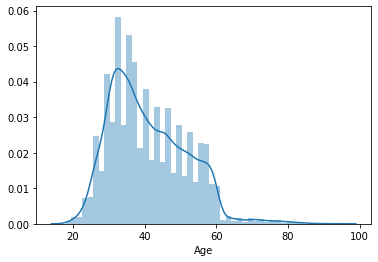

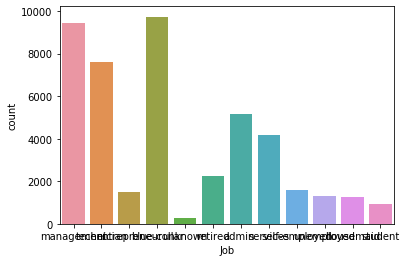

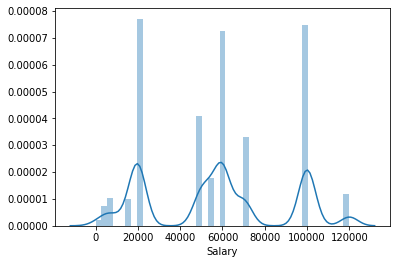

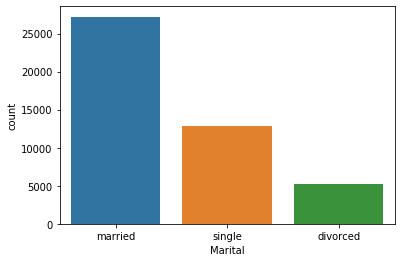

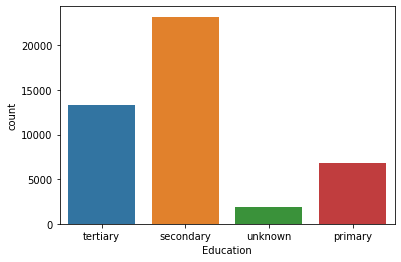

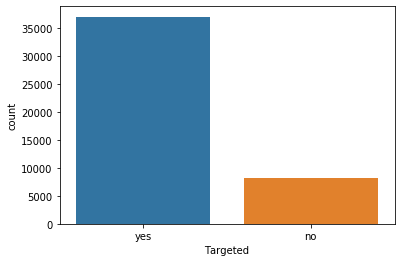

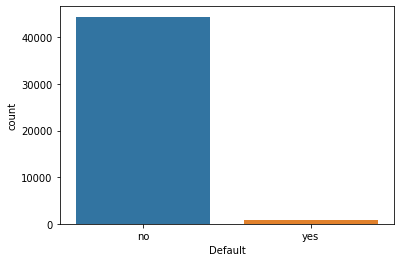

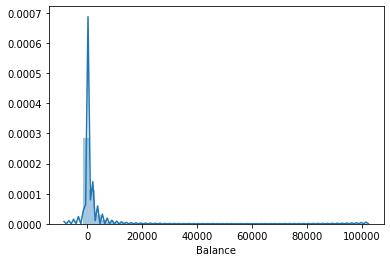

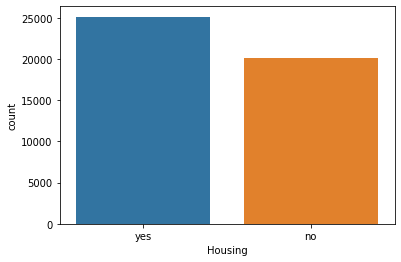

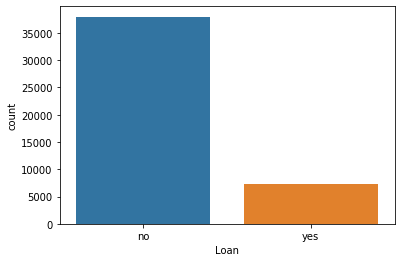

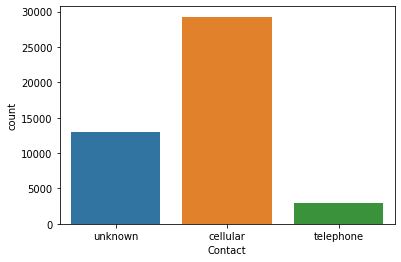

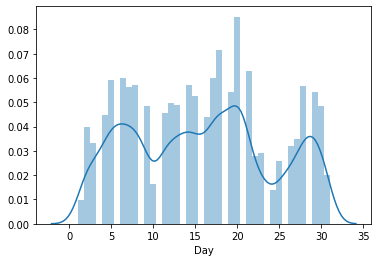

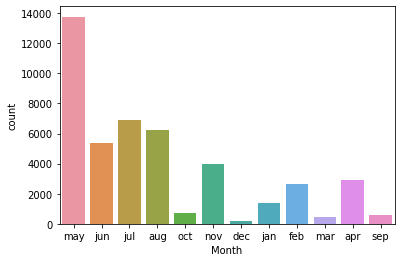

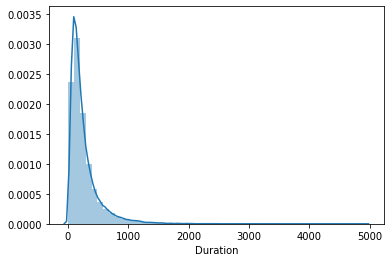

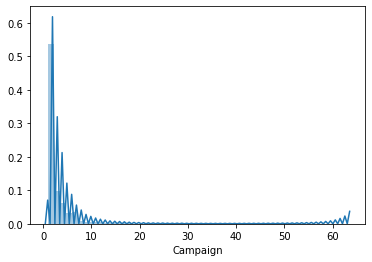

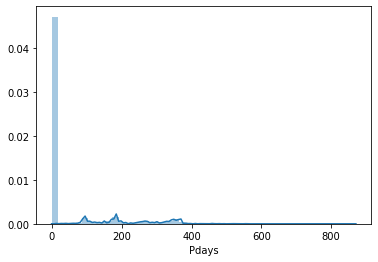

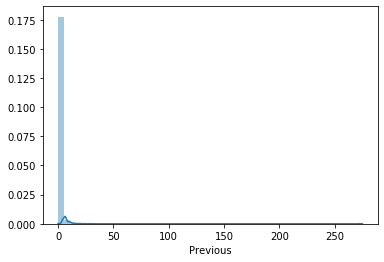

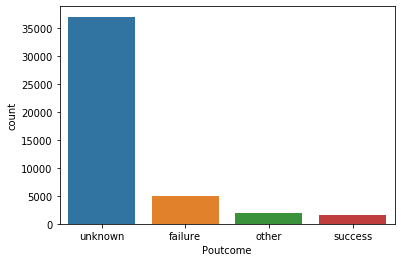

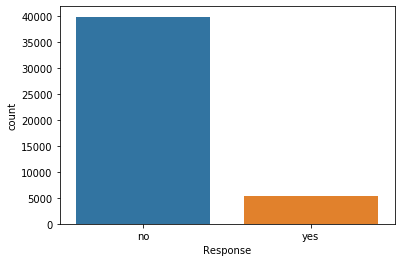

In [9]:
for i in df.columns:
    if df[i].dtype == 'int64':
        sns.distplot(df[i])
    else:
        sns.countplot(df[i])
    plt.xlabel(i.title())
    plt.show()

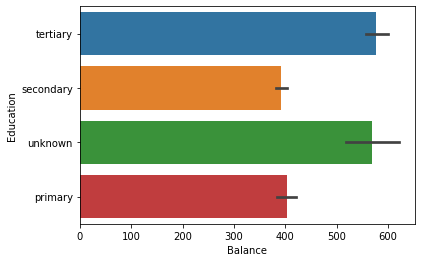

In [10]:
sns.barplot(x=df.balance, y=df.education, estimator=np.median);
plt.xlabel("Balance")
plt.ylabel("Education");

It can be seen from the barplot that the highest median value of `balance` belongs to `tertiary` followed very closely by `unknown`.

<br>

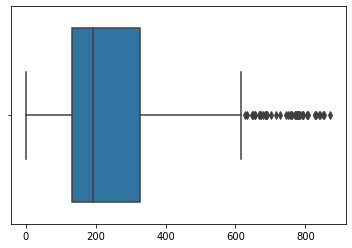

In [11]:
sns.boxplot(df[df.pdays > -1][['pdays']]);

As can be seen from the above boxplot, there are many outliers present in `pdays`

### Bi-variate Analysis

#### Numerical variables

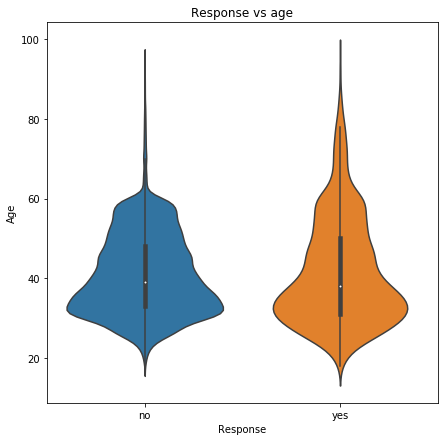

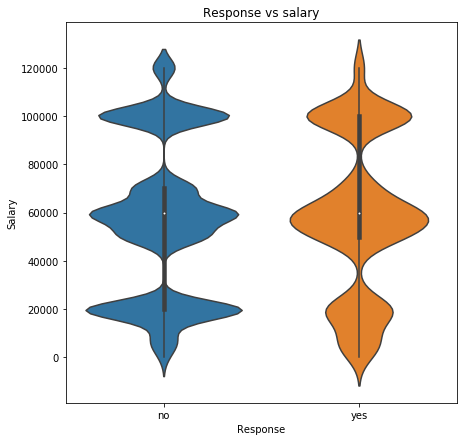

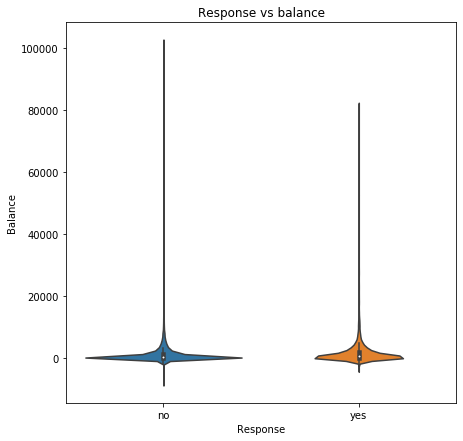

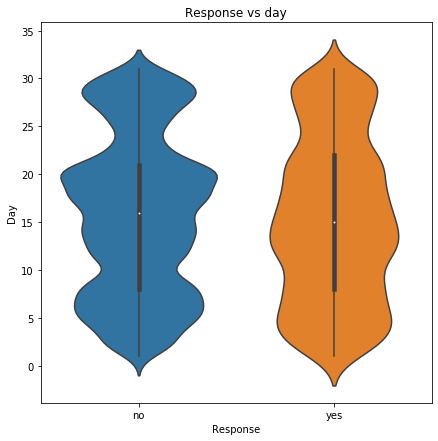

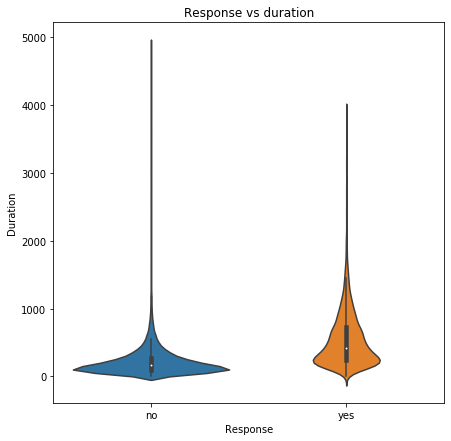

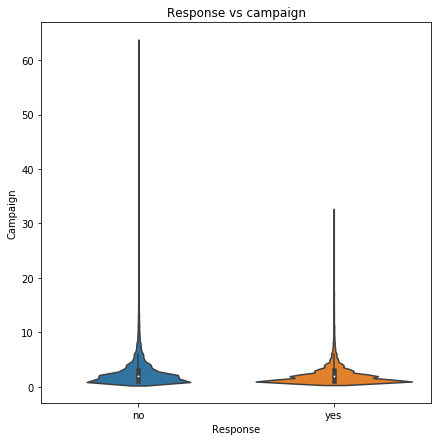

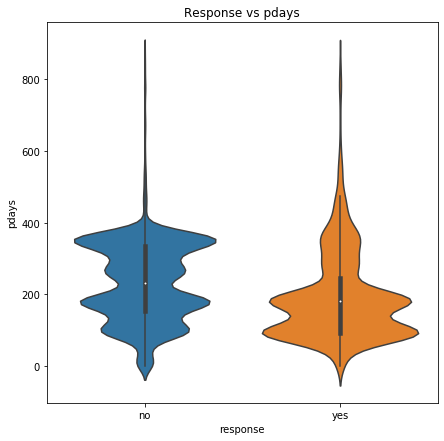

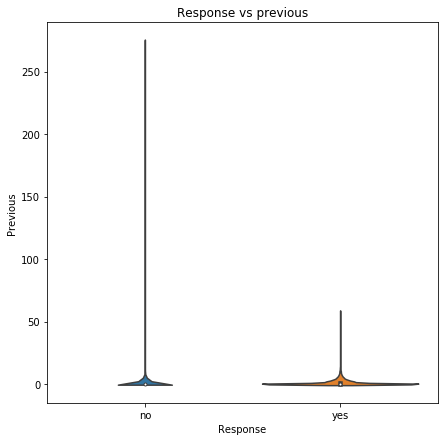

In [12]:
for i in df.columns:
    if df[i].dtype == 'int64':
        plt.figure(figsize=(7,7))
        plt.title("Response vs " + i)
        if i == 'pdays':
            sns.violinplot(x=df.response, y=df[df.pdays > -1]['pdays'])
            continue
        sns.violinplot(x=df.response, y=df[i])
        plt.xlabel('Response')
        plt.ylabel(i.title())
        plt.show()

<br>

#### Categorical variables

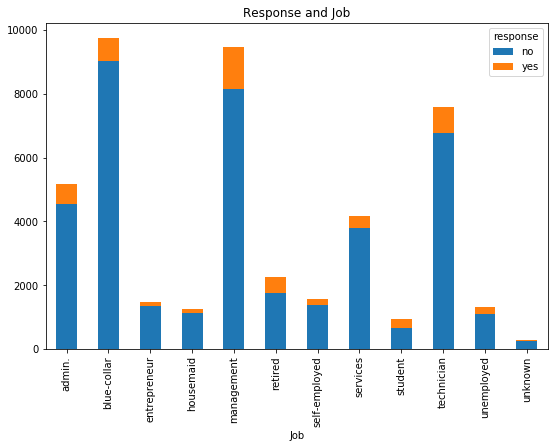

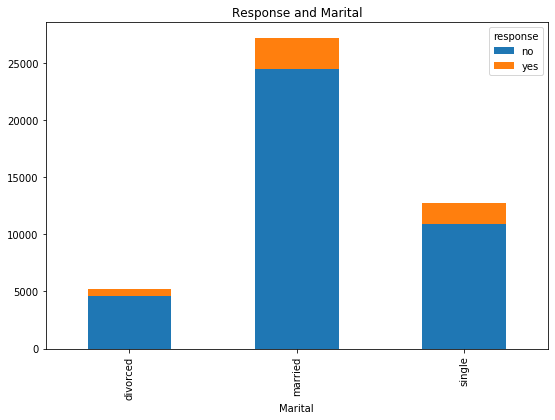

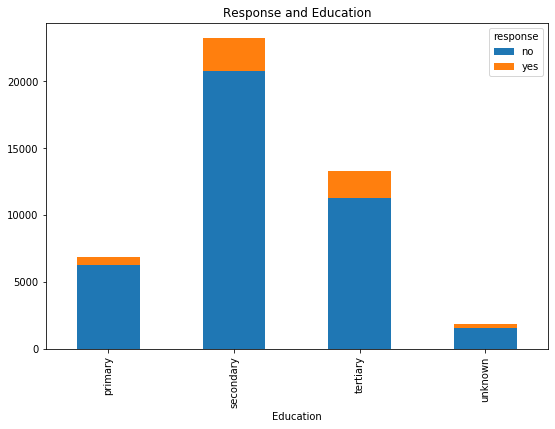

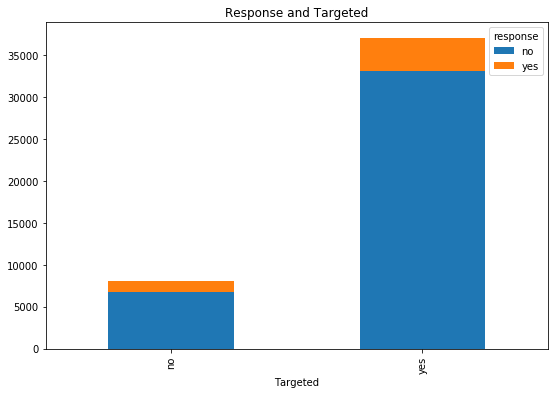

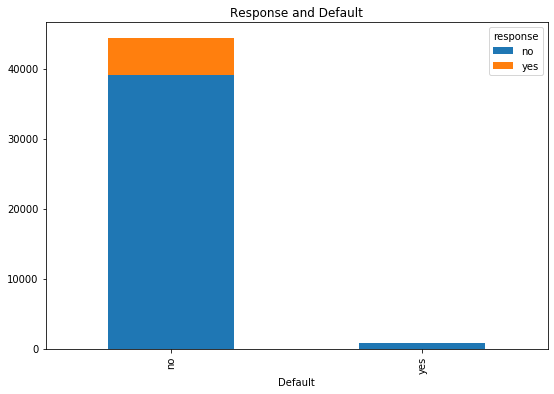

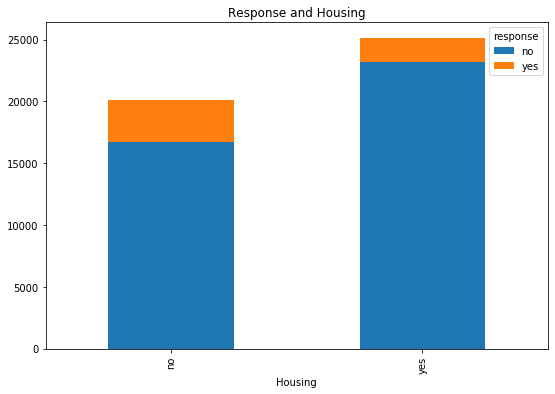

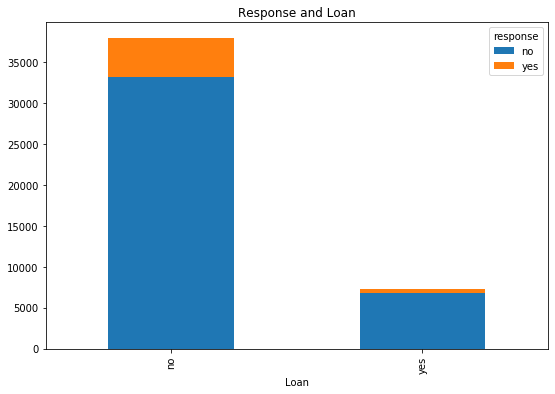

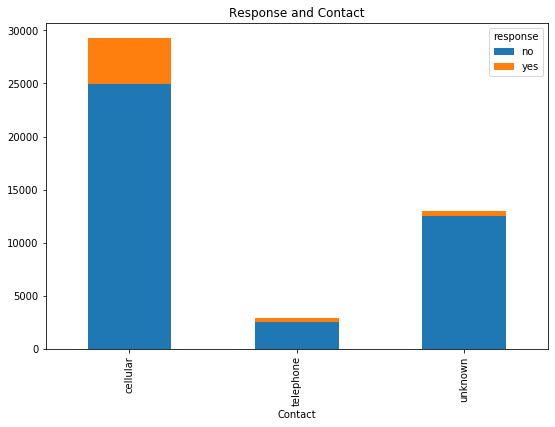

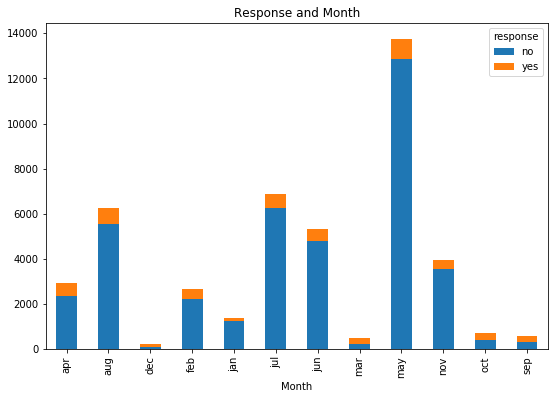

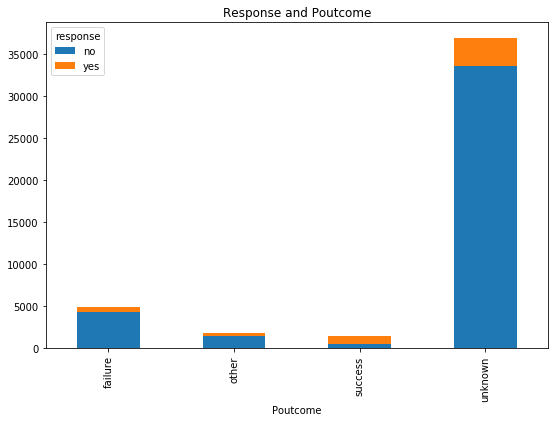

In [13]:
for i in df.columns:
    if i == 'response':
        continue
    if df[i].dtype == 'object':
        bidf = df.groupby(['response',i]).size().reset_index().pivot(columns='response',index=i,values=0)
        bidf.plot(kind='bar', stacked=True, figsize=(9,6))
        plt.title("Response and " +i.title())
        plt.xlabel(i.title())
        plt.show()

<br>

Replacing the `-1` value of `pdays` with `NaN` -

In [14]:
df.replace({'pdays': {-1:np.nan}}, inplace=True)

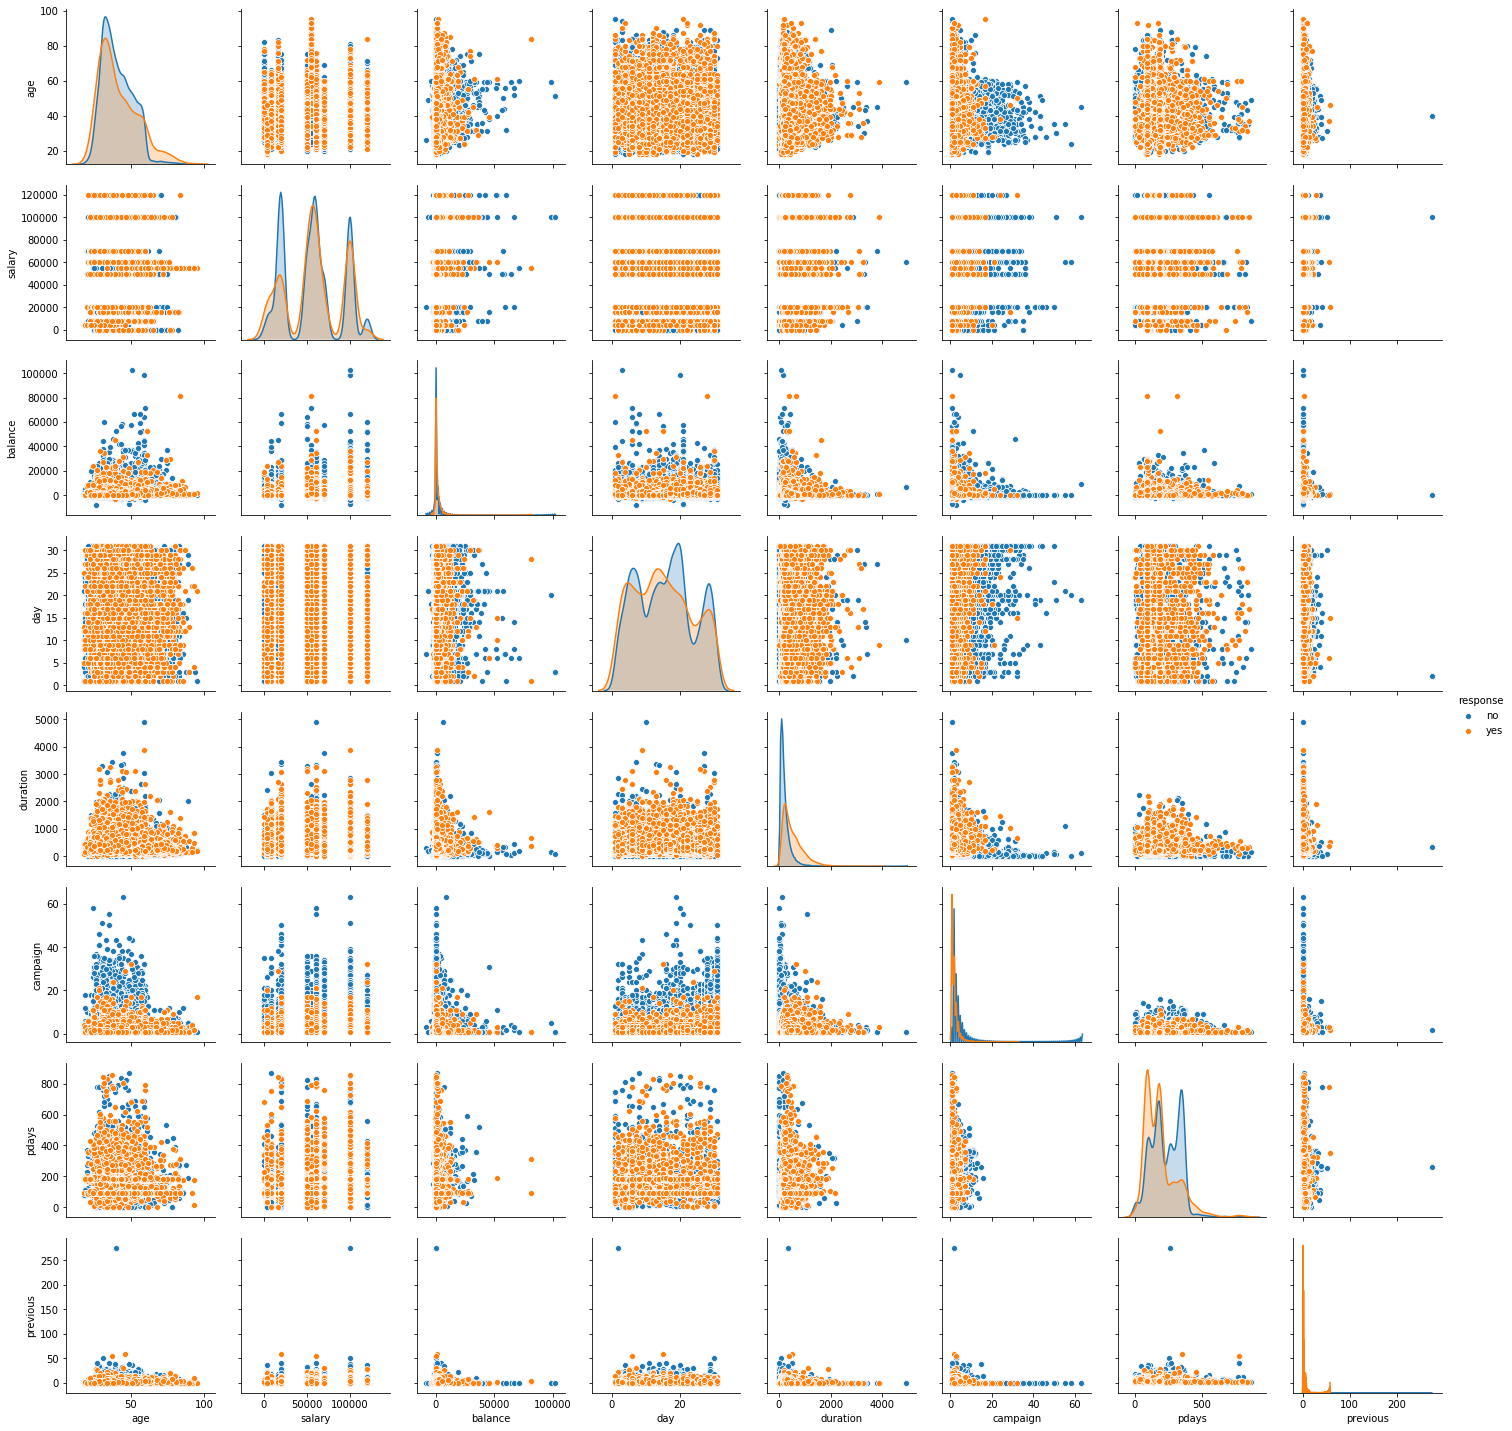

In [15]:
sns.pairplot(df,hue='response', diag_kind='kde');

Replacing the values of `response` variable from `(yes,no)` to `(1,0)`

In [16]:
df.replace({'response': {'yes':1, 'no':0}}, inplace=True)

In [17]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.107863,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.106134,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,-0.108122,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.090095,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.024407,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,0.050534,-0.032855,-0.073172
pdays,-0.107863,-0.106134,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,-0.152206
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,-0.021885,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,-0.152206,0.093236,1.000000


________________________________________________________________________________________________________________

Usng <i>crosstab( )</i> function to see cross tabulation between `job` and `education`. The unknown values will then be distributed amongst the appropriate groups proportionately using the function <i>np.random.choice( )</i>

In [18]:
crossdf = pd.crosstab(df.education, df.job)
crossdf

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39
unknown,171,454,76,45,242,119,39,150,163,242,29,127


In [19]:
for i in crossdf:
    if i == 'unknown':
        continue
    fill = np.random.choice(df.loc[(df['education']!='unknown') & (df['job']==i),'education'], crossdf[i][3])
    df.loc[(df['education']=='unknown') & (df['job']==i),'education'] = fill

In [20]:
pd.crosstab(df.education, df.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,220,3942,191,652,300,840,132,356,57,165,264,51
secondary,4360,5635,575,409,1147,1040,590,3590,608,5384,742,71
tertiary,591,155,721,179,8011,384,857,208,273,2048,297,39
unknown,0,0,0,0,0,0,0,0,0,0,0,127


In [21]:
crossdf2 = pd.crosstab(df.job, df.education)
crossdf2

education,primary,secondary,tertiary,unknown
job,,,,
admin.,220,4360,591,0
blue-collar,3942,5635,155,0
entrepreneur,191,575,721,0
housemaid,652,409,179,0
management,300,1147,8011,0
retired,840,1040,384,0
self-employed,132,590,857,0
services,356,3590,208,0
student,57,608,273,0


In [22]:
for i in crossdf2:
    if i == 'unknown':
        continue
    fill = np.random.choice(df.loc[(df['job']!='unknown') & (df['education']==i),'job'], crossdf2[i][11])
    df.loc[(df['job']=='unknown') & (df['education']==i),'job'] = fill

In [23]:
pd.crosstab(df.job, df.education)

education,primary,secondary,tertiary,unknown
job,,,,
admin.,222,4370,592,0
blue-collar,3978,5654,155,0
entrepreneur,191,579,727,0
housemaid,656,412,180,0
management,301,1147,8029,0
retired,845,1043,384,0
self-employed,132,591,863,0
services,358,3603,209,0
student,57,610,274,0


In [24]:
df.replace('unknown',np.nan,inplace=True)

In [25]:
df.isna().any()

age          False
job           True
salary       False
marital      False
education     True
targeted     False
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays         True
previous     False
poutcome      True
response     False
dtype: bool

Dropping the remaining missing value rows common to `education` and `job` columns-

In [26]:
df.dropna(subset=['education'], axis=0, inplace=True)

In [27]:
df.isna().any()

age          False
job          False
salary       False
marital      False
education    False
targeted     False
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays         True
previous     False
poutcome      True
response     False
dtype: bool

cellular     0.648478
NaN          0.287596
telephone    0.063925
Name: contact, dtype: float64


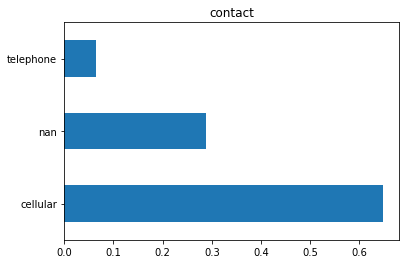

NaN      0.817097
182.0    0.003682
92.0     0.003238
183.0    0.002795
91.0     0.002795
181.0    0.002595
370.0    0.002196
184.0    0.001885
364.0    0.001708
95.0     0.001641
350.0    0.001619
94.0     0.001597
175.0    0.001575
185.0    0.001486
343.0    0.001442
93.0     0.001442
188.0    0.001397
186.0    0.001331
189.0    0.001331
174.0    0.001264
96.0     0.001264
349.0    0.001264
363.0    0.001220
90.0     0.001198
97.0     0.001198
365.0    0.001131
196.0    0.001131
368.0    0.001087
342.0    0.001087
98.0     0.001087
           ...   
411.0    0.000022
425.0    0.000022
592.0    0.000022
439.0    0.000022
828.0    0.000022
686.0    0.000022
595.0    0.000022
445.0    0.000022
842.0    0.000022
452.0    0.000022
667.0    0.000022
550.0    0.000022
500.0    0.000022
428.0    0.000022
486.0    0.000022
838.0    0.000022
404.0    0.000022
470.0    0.000022
589.0    0.000022
791.0    0.000022
401.0    0.000022
380.0    0.000022
18.0     0.000022
432.0    0.000022
25.0     0

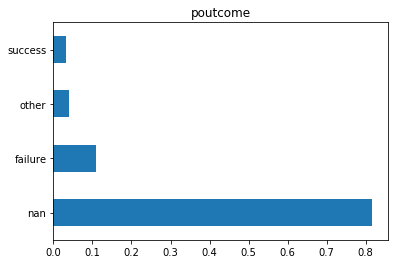

In [28]:
for i in df.columns:
    if df[i].isna().any():
        print(df[i].value_counts(dropna=False, normalize=True))
        if i=='pdays':
            print('\n\n')
            continue
        df[i].value_counts(dropna=False, normalize=True).plot(kind='barh')
        plt.title(i)
        plt.show()

It can be seen that `81.7%` of rows belonging to both `pdays` and `poutcome` are missing values and hence, will not assist in any prediction. Therefore, they will be dropped.

In [29]:
df.drop(columns=['pdays','poutcome'], inplace=True)

The `contact` variable has some empty values which will be filled proportionately-

In [30]:
array = np.array(df[df.contact.notna()].contact)
size = df[df.contact.isna()].contact.size

In [31]:
df.loc[df.contact.isna(),'contact'] = np.random.choice(array,size)

In [32]:
df.contact.value_counts(dropna=False)

cellular     41047
telephone     4037
Name: contact, dtype: int64

In [33]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,previous,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,cellular,5,may,261,1,0,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,cellular,5,may,151,1,0,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,cellular,5,may,76,1,0,0
3,47,blue-collar,20000,married,primary,no,no,1506,yes,no,cellular,5,may,92,1,0,0
5,35,management,100000,married,tertiary,yes,no,231,yes,no,cellular,5,may,139,1,0,0


Now, to check if previous campaign variables are useful or not -

In [34]:
df[['previous','response']].corr()

,previous,response
previous,1.000000,0.093159
response,0.093159,1.000000


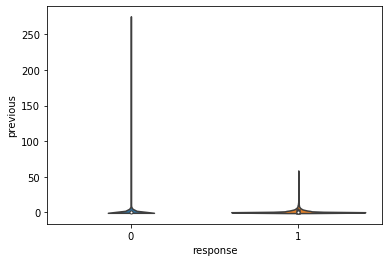

In [35]:
sns.violinplot(x=df.response, y=df.previous);

In [36]:
df.previous.value_counts()

0      36838
1       2767
2       2103
3       1141
4        713
5        459
6        276
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

The data from previous campaign has proven to be not very useful. The variable `previous` has a very weak association with the target variable. It can be seen that there is not even a single `yes` response when `previous` is high but that does not prove anything as there are very few high `previous` values to form a judgement.

`pdays` and `poutcome` had majority values missing and so the only fair thing to do was to drop them.

In [37]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,previous,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,cellular,5,may,261,1,0,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,cellular,5,may,151,1,0,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,cellular,5,may,76,1,0,0
3,47,blue-collar,20000,married,primary,no,no,1506,yes,no,cellular,5,may,92,1,0,0
5,35,management,100000,married,tertiary,yes,no,231,yes,no,cellular,5,may,139,1,0,0


`duration` attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. Hence, it should be dropped.

In [38]:
df.drop(columns=['duration'],inplace=True)

In [39]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,campaign,previous,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,cellular,5,may,1,0,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,cellular,5,may,1,0,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,cellular,5,may,1,0,0
3,47,blue-collar,20000,married,primary,no,no,1506,yes,no,cellular,5,may,1,0,0
5,35,management,100000,married,tertiary,yes,no,231,yes,no,cellular,5,may,1,0,0


### Label Encoding

In [40]:
df.education.value_counts()

secondary    24151
tertiary     13763
primary       7170
Name: education, dtype: int64

`education` is the only column that can be and should be converted into numerical columns via Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [43]:
df.education = le.fit_transform(df.education)

In [44]:
df.education.value_counts()

1    24151
2    13763
0     7170
Name: education, dtype: int64

Now that `education` is transformed, the rest of the categorical variables have to be converted to numeric form as well before a model can be built. To do that, I am converting them into dummies.

### Dummy Creation

In [45]:
objdf = df.select_dtypes(include='object')

In [46]:
objdf.head()

,job,marital,targeted,default,housing,loan,contact,month
0,management,married,yes,no,yes,no,cellular,may
1,technician,single,yes,no,yes,no,cellular,may
2,entrepreneur,married,yes,no,yes,yes,cellular,may
3,blue-collar,married,no,no,yes,no,cellular,may
5,management,married,yes,no,yes,no,cellular,may


In [47]:
dumdf = pd.get_dummies(objdf, drop_first=False)
dumdf.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
dumdf.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'targeted_no', 'targeted_yes',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [49]:
newdf = pd.concat([df.select_dtypes(exclude='object'), dumdf], sort=True, axis=1)
newdf.head()

,age,salary,education,balance,day,campaign,previous,response,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,100000,2,2143,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,29,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,2,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,20000,0,1506,5,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,2,231,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = newdf.drop('response', axis=1)
X.head()

,age,salary,education,balance,day,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,100000,2,2143,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,29,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,2,5,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,20000,0,1506,5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,2,231,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
y = newdf.response
y.head()

0    0
1    0
2    0
3    0
5    0
Name: response, dtype: int64

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31558, 43), (13526, 43), (31558,), (13526,))

In [55]:
columns = X_train.columns

#### Min-Max Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

In [57]:
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [59]:
logreg = LogisticRegression()

#### RFE (Recursive Feature Elimination)

In [60]:
from sklearn.feature_selection import RFE

In [126]:
rfe_selector = RFE(logreg, 13, verbose=True)

In [127]:
rfe_selector.fit(X_train, y_train)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=13, step=1, verbose=True)

In [128]:
rfe_selector.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True])

In [129]:
rfe_selector.ranking_

array([27, 19,  8,  1, 24,  1,  1, 31, 30, 13,  9, 20,  5, 23, 21,  1, 22,
       16, 17, 12, 28,  7,  6, 18, 11, 29,  1, 26,  1, 15, 14, 25,  3,  1,
       10,  1,  4,  2,  1,  1,  1,  1,  1])

In [130]:
cols_keep = X_train.columns[rfe_selector.support_]
cols_keep

Index(['balance', 'campaign', 'previous', 'job_student', 'housing_yes',
       'loan_yes', 'month_dec', 'month_jan', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

#### VIF and p-value

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [132]:
[variance_inflation_factor(X_train[cols_keep].values, ind) for ind in range(5)]

[2.769676929645458,
 1.3143161323117944,
 1.1184949184200528,
 1.0322833085645629,
 2.620374149568216]

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_keep].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_keep].values, i) for i in range(X_train[cols_keep].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,balance,2.77
4,housing_yes,2.62
9,month_may,1.91
1,campaign,1.31
10,month_nov,1.21
5,loan_yes,1.17
2,previous,1.12
7,month_jan,1.06
11,month_oct,1.04
12,month_sep,1.04


In [134]:
X_train_sm = sm.add_constant(X_train[cols_keep])
X_train_sm.head()

,const,balance,campaign,previous,job_student,housing_yes,loan_yes,month_dec,month_jan,month_mar,month_may,month_nov,month_oct,month_sep
0,1.0,0.095646,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.086431,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.072803,0.087719,0.072727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.072803,0.052632,0.036364,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.136818,0.210526,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
y_sm = list(y_train)
lr = sm.OLS(y_sm, X_train_sm).fit()

In [136]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     242.8
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:04:29   Log-Likelihood:                -7572.5
No. Observations:               31558   AIC:                         1.517e+04
Df Residuals:                   31544   BIC:                         1.529e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1281      0.006     19.964      0.000       0.116       0.141
balance         0.3400      0.064      5.351      0.000       0.215       0.464
campaign       -0.3816      0.033    -11.642      0.000      -0.446      -0.317
previous        0.8802      0.051     17.425      0.000       0.781       0.979
job_student     0.1125      0.012      9.052      0.000       0.088       0.137
housing_yes    -0.0552      0.004    -14.089      0.000      -0.063      -0.048
loan_yes       -0.0444      0.005     -9.357      0.000      -0.054      -0.035
month_dec       0.3021      0.025     12.024      0.000       0.253       0.351
month_jan      -0.0386      0.010     -3.776      0.000      -0.059      -0.019
month_mar       0.3628      0.018     20.657      0.000       0.328       0.397
month_may      -0.0368      0.004     -8.415      0.000      -0.045      -0.028
month_nov      -0.0239      0.006     -3.728      0.000      -0.037      -0.011
month_oct       0.2972      0.014     21.388      0.000       0.270       0.324
month_sep       0.3022      0.016     19.171      0.000       0.271       0.333
==============================================================================
Omnibus:                    12720.146   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41624.396
Skew:                           2.144   Prob(JB):                         0.00
Kurtosis:                       6.643   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
logreg.fit(X_train[cols_keep], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
logreg.classes_

array([0, 1], dtype=int64)

In [139]:
logreg.coef_

array([[ 1.93463796, -5.47339483,  5.49067118,  0.72703367, -0.56212776,
        -0.59728663,  1.49992361, -0.36896626,  1.77812573, -0.47901248,
        -0.21296906,  1.4768136 ,  1.46864616]])

Metrics on train data-

In [140]:
y_train_pred = logreg.predict(X_train[cols_keep])
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
accuracy_score(y_train, y_train_pred)

0.8833576272260599

In [142]:
precision_score(y_train, y_train_pred)

0.5380530973451327

In [143]:
recall_score(y_train, y_train_pred)

0.08163265306122448

Metrics on test data-

In [144]:
y_test_pred = logreg.predict(X_test[cols_keep])
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
accuracy_score(y_test, y_test_pred)

0.8838533195327517

In [146]:
precision_score(y_test, y_test_pred)

0.4552238805970149

In [147]:
recall_score(y_test, y_test_pred)

0.0788623141564318

The most important features from the Logistic Regression model are `campaign` and `previous` later followed by `balance`.

In [148]:
confusion_matrix(y_test, y_test_pred)

array([[11833,   146],
       [ 1425,   122]], dtype=int64)

### Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=2, n_estimators=50)

In [171]:
rf.fit(X_train[cols_keep],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [172]:
y_pred = rf.predict(X_test[cols_keep])

In [173]:
accuracy_score(y_test, y_pred)

0.8856276800236581

In [174]:
precision_score(y_test, y_pred)

0.0

In [175]:
recall_score(y_test, y_pred)

0.0

In [176]:
rf.feature_importances_

array([2.93740120e-02, 4.22103396e-02, 1.72345689e-01, 0.00000000e+00,
       3.12223754e-01, 0.00000000e+00, 3.66726195e-02, 5.90396750e-06,
       1.76879729e-01, 0.00000000e+00, 0.00000000e+00, 6.07768952e-02,
       1.69511057e-01])

The most important features for the Random Forest Classifier model are `balance`,`campaign` and `previous`.

In [177]:
confusion_matrix(y_test, y_pred)

array([[11979,     0],
       [ 1547,     0]], dtype=int64)

### Comparison of LR and RFC

When evaluated on the test set, the accuracy for Logistic Regression is 88.38% whereas the accuracy for Random Forest Classifier is 88.56%. The accuracy for Random Forest Classifier is slightly higher.

Random Forest Classifier has slightly better performance on the test set when compared on the grounds of accuracy. The recall and precision being zero in case of RFE point to there being no true positives.

The top 3 important features in both the models are the same but the order differs in both.